In [1]:

!pip install pandas --no-index
!pip install seaborn --no-index
!pip install numpy --no-index
!pip install matplotlib --no-index

Ignoring pip: markers 'python_version < "3"' don't match your environment
Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/avx, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic
Ignoring pip: markers 'python_version < "3"' don't match your environment
Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/avx, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic
Ignoring pip: markers 'python_version < "3"' don't match your environment
Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/avx, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic
Ignoring pip: markers 'python_version < "3"' don't match your environment
Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/avx, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import numpy as np
from pandas.api.types import CategoricalDtype

temp_path = "/project/cq-training-1/project1/data/dummy_test_catalog.pkl"
path = "/project/cq-training-1/project1/data/catalog.helios.public.20100101-20160101.pkl"

with open(path,'rb') as f:
 x = pickle.load(f)

In [3]:
x1 = x.iloc[:,5:9]
x2 = x.iloc[:,9:13]
x3 = x.iloc[:,13:17]
x4 = x.iloc[:,17:21]
x5 = x.iloc[:,21:25]
x6 = x.iloc[:,25:29]
x7 = x.iloc[:,29:]

In [4]:
def func(X_):
    X = X_.copy()
    sta = list(X.columns)[1][:3]
    X = X[X[sta+"_DAYTIME"]!=0][X[sta+"_GHI"].notnull() == True][[sta+"_CLEARSKY_GHI",sta+"_GHI"]]
    return X

In [5]:
def func2(X_):
    X = X_.copy()
    M = X.median()
    sta = list(X.columns)[1][:3]
    Q_C = np.nanpercentile(X[sta+"_CLEARSKY_GHI"], 75) - np.nanpercentile(X[sta+"_CLEARSKY_GHI"], 25)
    Q_G = np.nanpercentile(X[sta+"_GHI"], 75) - np.nanpercentile(X[sta+"_GHI"], 25)
    return M[0], Q_C, M[1], Q_G

In [6]:
def func3(X_, median_clearsky, p_clearsky, median_station, p_station):
    X = X_.copy()
    sta = list(X.columns)[1][:3]
    X[sta+"_GHI"] = (X[sta+"_GHI"]-median_station)/p_station
    X[sta+"_CLEARSKY_GHI"] = (X[sta+"_CLEARSKY_GHI"]-median_clearsky)/p_clearsky
    return X

### Only daytime

In [7]:
x1 = func(x1)
x2 = func(x2)
x3 = func(x3)
x4 = func(x4)
x5 = func(x5)
x6 = func(x6)
x7 = func(x7)

/opt/ipython-kernel/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [8]:
D = {'median_clearsky':[], 'p_clearsky':[], 'median_station':[], 'p_station':[]}

#### X1

In [9]:
median_clearsky, p_clearsky, median_station, p_station = func2(x1)
D['median_clearsky'].append(median_clearsky)
D['p_clearsky'].append(p_clearsky)
D['median_station'].append(median_station)
D['p_station'].append(p_station)

In [10]:
x1_ = func3(x1, median_clearsky, p_clearsky, median_station, p_station)

#### X2

In [11]:
median_clearsky, p_clearsky, median_station, p_station = func2(x2)
D['median_clearsky'].append(median_clearsky)
D['p_clearsky'].append(p_clearsky)
D['median_station'].append(median_station)
D['p_station'].append(p_station)

In [12]:
x2_ = func3(x2, median_clearsky, p_clearsky, median_station, p_station)

#### X3

In [13]:
median_clearsky, p_clearsky, median_station, p_station = func2(x3)
D['median_clearsky'].append(median_clearsky)
D['p_clearsky'].append(p_clearsky)
D['median_station'].append(median_station)
D['p_station'].append(p_station)

In [14]:
x3_ = func3(x3, median_clearsky, p_clearsky, median_station, p_station)

#### X4

In [15]:
median_clearsky, p_clearsky, median_station, p_station = func2(x4)
D['median_clearsky'].append(median_clearsky)
D['p_clearsky'].append(p_clearsky)
D['median_station'].append(median_station)
D['p_station'].append(p_station)

In [16]:
x4_ = func3(x4, median_clearsky, p_clearsky, median_station, p_station)

#### X5

In [17]:
median_clearsky, p_clearsky, median_station, p_station = func2(x5)
D['median_clearsky'].append(median_clearsky)
D['p_clearsky'].append(p_clearsky)
D['median_station'].append(median_station)
D['p_station'].append(p_station)

In [18]:
x5_ = func3(x5, median_clearsky, p_clearsky, median_station, p_station)

#### X6

In [19]:
median_clearsky, p_clearsky, median_station, p_station = func2(x6)
D['median_clearsky'].append(median_clearsky)
D['p_clearsky'].append(p_clearsky)
D['median_station'].append(median_station)
D['p_station'].append(p_station)

In [20]:
x6_ = func3(x6, median_clearsky, p_clearsky, median_station, p_station)

#### X7

In [21]:
median_clearsky, p_clearsky, median_station, p_station = func2(x7)
D['median_clearsky'].append(median_clearsky)
D['p_clearsky'].append(p_clearsky)
D['median_station'].append(median_station)
D['p_station'].append(p_station)

In [22]:
x7_ = func3(x7, median_clearsky, p_clearsky, median_station, p_station)

#### FInding appropriate meadians and q3-q1

In [23]:
D = pd.DataFrame(D)
D

,median_clearsky,p_clearsky,median_station,p_station
0,442.582702,483.889718,265.160000,463.980000
1,482.796767,535.788116,319.806667,486.273333
2,516.940992,537.112226,451.026667,551.310000
3,366.884147,479.361799,251.586667,418.898333
4,493.150100,501.919104,308.430000,514.586667
5,439.861975,489.043675,219.386667,418.966667
6,400.742834,481.884057,267.013333,436.398333


In [24]:
D.mean()

median_clearsky    448.994217
p_clearsky         501.285528
median_station     297.487143
p_station          470.059048
dtype: float64

In [25]:
D.median()

median_clearsky    442.582702
p_clearsky         489.043675
median_station     267.013333
p_station          463.980000
dtype: float64

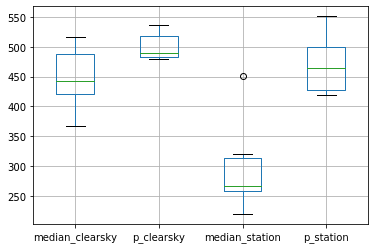

In [26]:
D.boxplot()

#### Analysis

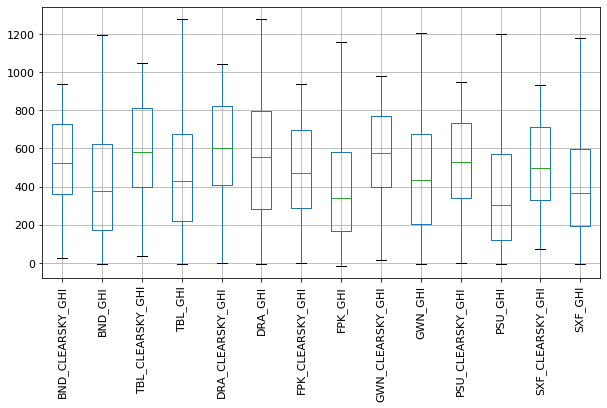

In [27]:
X = x1.merge(x2.merge(x3.merge(x4.merge(x5.merge(x6.merge(x7, left_index=True, right_index=True), left_index=True, right_index=True), left_index=True, right_index=True), left_index=True, right_index=True), left_index=True, right_index=True), left_index=True, right_index=True)
_ = X.boxplot(rot=90, fontsize=11, figsize=(10,5))

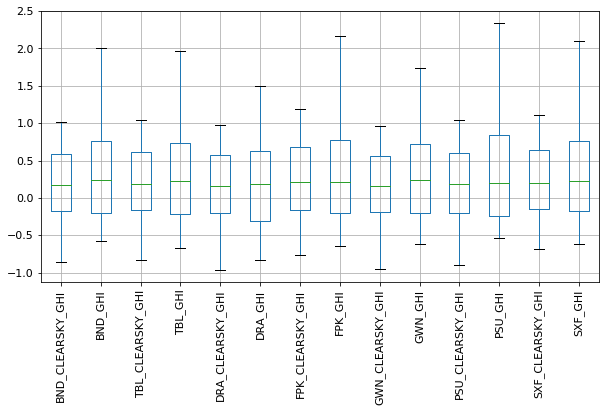

In [28]:
X_ = x1_.merge(x2_.merge(x3_.merge(x4_.merge(x5_.merge(x6_.merge(x7_, left_index=True, right_index=True), left_index=True, right_index=True), left_index=True, right_index=True), left_index=True, right_index=True), left_index=True, right_index=True), left_index=True, right_index=True)
_ = X_.boxplot(rot=90, fontsize=11, figsize=(10,5))

In [29]:
x1__ = func3(x1, D.mean()['median_clearsky'], D.mean()['p_clearsky'], D.mean()['median_station'], D.mean()['p_station'])
x2__ = func3(x2, D.mean()['median_clearsky'], D.mean()['p_clearsky'], D.mean()['median_station'], D.mean()['p_station'])
x3__ = func3(x3, D.mean()['median_clearsky'], D.mean()['p_clearsky'], D.mean()['median_station'], D.mean()['p_station'])
x4__ = func3(x4, D.mean()['median_clearsky'], D.mean()['p_clearsky'], D.mean()['median_station'], D.mean()['p_station'])
x5__ = func3(x5, D.mean()['median_clearsky'], D.mean()['p_clearsky'], D.mean()['median_station'], D.mean()['p_station'])
x6__ = func3(x6, D.mean()['median_clearsky'], D.mean()['p_clearsky'], D.mean()['median_station'], D.mean()['p_station'])
x7__ = func3(x7, D.mean()['median_clearsky'], D.mean()['p_clearsky'], D.mean()['median_station'], D.mean()['p_station'])

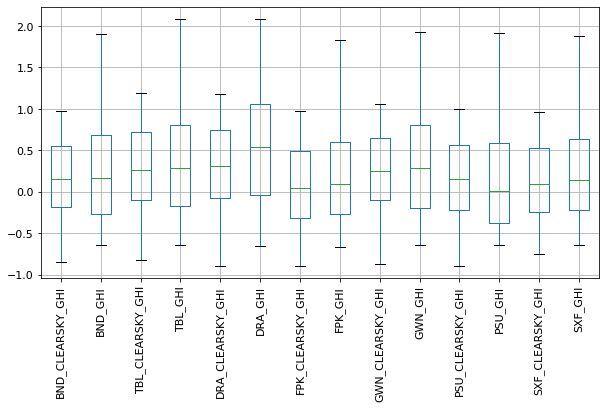

In [30]:
X__ = x1__.merge(x2__.merge(x3__.merge(x4__.merge(x5__.merge(x6__.merge(x7__, left_index=True, right_index=True), left_index=True, right_index=True), left_index=True, right_index=True), left_index=True, right_index=True), left_index=True, right_index=True), left_index=True, right_index=True)
_ = X__.boxplot(rot=90, fontsize=11, figsize=(10,5))

In [31]:
x1___ = func3(x1, D.median()['median_clearsky'], D.median()['p_clearsky'], D.median()['median_station'], D.median()['p_station'])
x2___ = func3(x2, D.median()['median_clearsky'], D.median()['p_clearsky'], D.median()['median_station'], D.median()['p_station'])
x3___ = func3(x3, D.median()['median_clearsky'], D.median()['p_clearsky'], D.median()['median_station'], D.median()['p_station'])
x4___ = func3(x4, D.median()['median_clearsky'], D.median()['p_clearsky'], D.median()['median_station'], D.median()['p_station'])
x5___ = func3(x5, D.median()['median_clearsky'], D.median()['p_clearsky'], D.median()['median_station'], D.median()['p_station'])
x6___ = func3(x6, D.median()['median_clearsky'], D.median()['p_clearsky'], D.median()['median_station'], D.median()['p_station'])
x7___ = func3(x7, D.median()['median_clearsky'], D.median()['p_clearsky'], D.median()['median_station'], D.median()['p_station'])

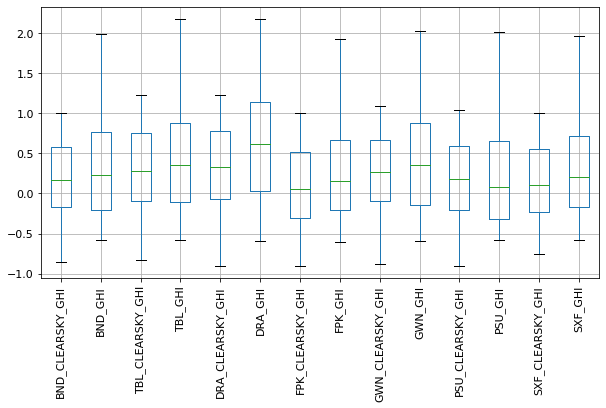

In [32]:
X___ = x1___.merge(x2___.merge(x3___.merge(x4___.merge(x5___.merge(x6___.merge(x7___, left_index=True, right_index=True), left_index=True, right_index=True), left_index=True, right_index=True), left_index=True, right_index=True), left_index=True, right_index=True), left_index=True, right_index=True)
_ = X___.boxplot(rot=90, fontsize=11, figsize=(10,5))

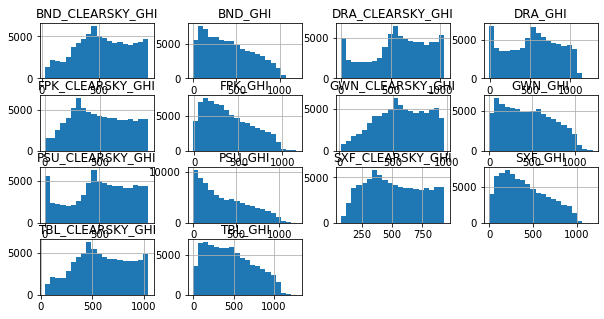

In [33]:
_ = X.hist(bins=20, figsize=(10,5))

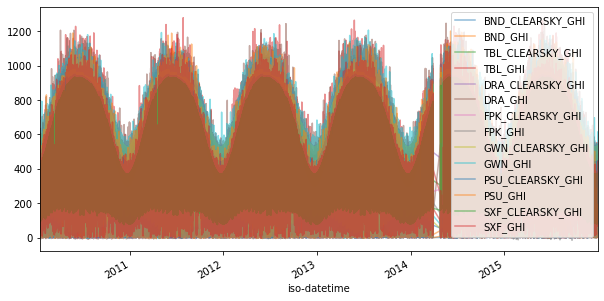

In [34]:
_ = X.plot(figsize=(10,5), alpha=0.5)

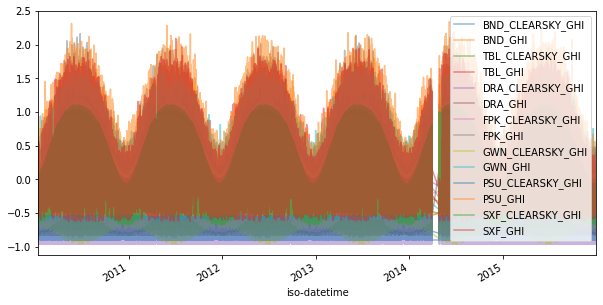

In [35]:
_ = X_.plot(figsize=(10,5), alpha=0.5)

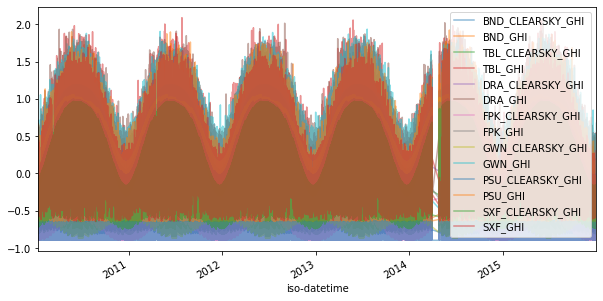

In [36]:
_ = X__.plot(figsize=(10,5), alpha=0.5)

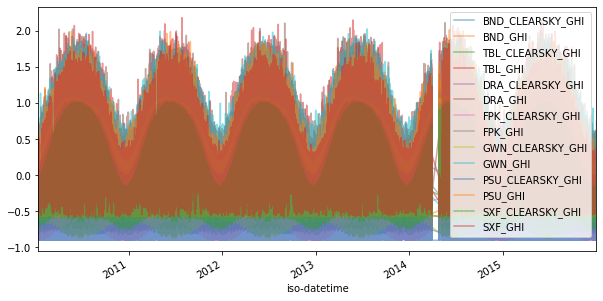

In [37]:
_ = X___.plot(figsize=(10,5), alpha=0.5)

In [46]:
def func4(Y, Y_, m):
    X_rescaled = Y_.copy()
    for i in range(7):
        sta = list(Y_.columns)[::2][i][:3]
        for j,(c_m,c_p) in enumerate(zip(list(D.columns[:-1:2]), list(D.columns)[1::2])):
            if j%2==0:
                if m == 'mean':
                    X_rescaled[sta+"_CLEARSKY_GHI"] = (Y_[sta+"_CLEARSKY_GHI"]*D[c_p].mean())+D[c_m].mean()
                else:
                    X_rescaled[sta+"_CLEARSKY_GHI"] = (Y_[sta+"_CLEARSKY_GHI"]*D[c_p].median())+D[c_m].median()
            else:
                if m == 'mean':
                    X_rescaled[sta+"_GHI"] = (Y_[sta+"_GHI"]*D[c_p].mean())+D[c_m].mean()
                else:
                    X_rescaled[sta+"_GHI"] = (Y_[sta+"_GHI"]*D[c_p].median())+D[c_m].median()
    X_rescaled.boxplot()
    print("Avg. Error:", (X_rescaled - Y).mean().mean())

Avg. Error: 1.527774449818317e-17


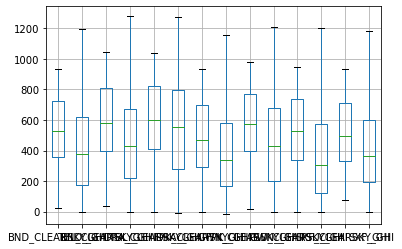

In [47]:
func4(X, X__, 'mean')

Avg. Error: -4.798536434060523e-15


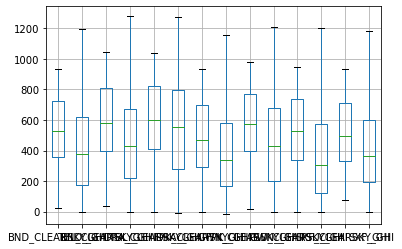

In [48]:
func4(X, X___, 'median')

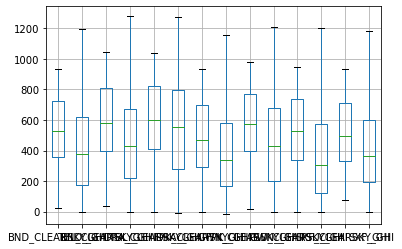

In [40]:
X.boxplot()

## Values to use for normalization:

In [49]:
D.mean()

median_clearsky    448.994217
p_clearsky         501.285528
median_station     297.487143
p_station          470.059048
dtype: float64


$$ \text{<station>_GHI}  = \frac{\text{<station>_CLEARSKY_GHI>} - \text{median_station}}{\text{p_station}}$$

$$ \text{<station>_CLEARSKY_GHI}  = \frac{\text{<station>_CLEASKY_GHI} - \text{median_clearsky}}{\text{p_clearsky}}$$